# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

For (α, σ) = (0.25, 0.50):    HF = 3.00, HM = 5.50, HF/HM: 0.55
For (α, σ) = (0.50, 0.50):    HF = 4.50, HM = 4.50, HF/HM: 1.00
For (α, σ) = (0.75, 0.50):    HF = 5.50, HM = 3.00, HF/HM: 1.83
For (α, σ) = (0.25, 1.00):    HF = 2.00, HM = 6.50, HF/HM: 0.31
For (α, σ) = (0.50, 1.00):    HF = 4.50, HM = 4.50, HF/HM: 1.00
For (α, σ) = (0.75, 1.00):    HF = 6.50, HM = 2.00, HF/HM: 3.25
For (α, σ) = (0.25, 1.50):    HF = 1.50, HM = 7.00, HF/HM: 0.21
For (α, σ) = (0.50, 1.50):    HF = 4.50, HM = 4.50, HF/HM: 1.00
For (α, σ) = (0.75, 1.50):    HF = 7.00, HM = 1.50, HF/HM: 4.67


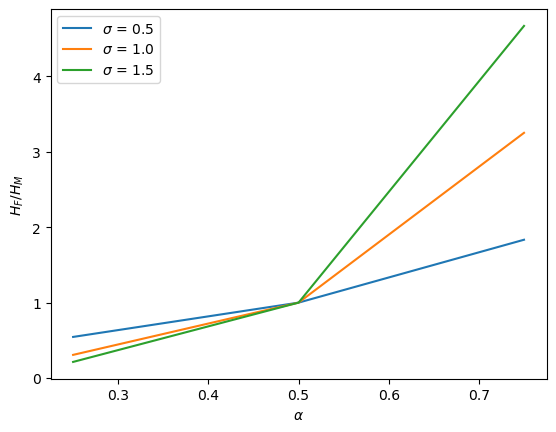

In [21]:
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

alpha_values = [ 0.25, 0.5, 0.75]
sigma_values = [ 0.5, 1.0, 1.5]
res = {}

#Discrete solving for every combination of alpha and sigma:
for sigma in sigma_values:
    model.par.sigma = sigma
    for alpha in alpha_values:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        #Saving results
        HFHM_ratio = opt.HF/opt.HM
        res[(alpha, sigma)] = HFHM_ratio
        
        #Printing results
        print(f'For (\u03b1, \u03c3) = ({model.par.alpha:.2f}, {model.par.sigma:.2f}):    HF = {opt.HF:.2f}, HM = {opt.HM:.2f}, HF/HM: {HFHM_ratio:.2f}')

#Plotting HF/HM on alpha for every valye of sigma:
fig, ax = plt.subplots()
for sigma in list_sigmas:
    y = [res[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f"$\u03c3$ = {sigma}")
ax.set_xlabel("$\u03b1$")
ax.set_ylabel("$H_F/H_M$")
ax.legend()
plt.show()

# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.